DIABETES DIOGONISTIC MODEL

The data attributes
are: No. of Patient, Sugar Level Blood, Age, Gender, Creatinine ratio(Cr), Body Mass Index (BMI), Urea, Cholesterol (Chol), 
Fasting lipid profile, including total, LDL, VLDL, Triglycerides(TG) and HDL Cholesterol , HBA1C, Class (the patient's 
diabetes disease class may be Diabetic, Non-Diabetic, or Predict-Diabetic).

IMPORT DEPENDENCES

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Import dataset

In [78]:
diabetes_data = pd.read_csv('./Dataset of Diabetes .csv')

View the firt 5 rows

In [79]:
diabetes_data.head()

,ID,No_Pation,Gender,AGE,Urea,Creatinine ratio,HbA1c,Cholesterol,Triglycerides,HDL Cholesterol,Low density lipoprotein,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [80]:
diabetes_data.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Creatinine ratio', 'HbA1c',
       'Cholesterol', 'Triglycerides', 'HDL Cholesterol',
       'Low density lipoprotein', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

Rename columns

In [81]:
diabetes_data.rename(columns={'Creatinine ratio':'Creatinine_ratio','Low density lipoprotein':'Low_density_lipoprotein',
                              'HDL Cholesterol':'HDL_Cholesterol'},inplace=True)

In [82]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1000 non-null   int64  
 1   No_Pation                1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   AGE                      1000 non-null   int64  
 4   Urea                     1000 non-null   float64
 5   Creatinine_ratio         1000 non-null   int64  
 6   HbA1c                    1000 non-null   float64
 7   Cholesterol              1000 non-null   float64
 8   Triglycerides            1000 non-null   float64
 9   HDL_Cholesterol          1000 non-null   float64
 10  Low_density_lipoprotein  1000 non-null   float64
 11  VLDL                     1000 non-null   float64
 12  BMI                      1000 non-null   float64
 13  CLASS                    1000 non-null   object 
dtypes: float64(8), int64(4), 

Plot statistical anaytics of the given dataset

In [83]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000.0,340.500000,2.403977e+02,1.0,125.75,300.5,550.25,800.00
No_Pation,1000.0,270551.408000,3.380758e+06,123.0,24063.75,34395.5,45384.25,75435657.00
AGE,1000.0,53.528000,8.799241e+00,20.0,51.00,55.0,59.00,79.00
Urea,1000.0,5.124743,2.935165e+00,0.5,3.70,4.6,5.70,38.90
Creatinine_ratio,1000.0,68.943000,5.998475e+01,6.0,48.00,60.0,73.00,800.00
HbA1c,1000.0,8.281160,2.534003e+00,0.9,6.50,8.0,10.20,16.00
Cholesterol,1000.0,4.862820,1.301738e+00,0.0,4.00,4.8,5.60,10.30
Triglycerides,1000.0,2.349610,1.401176e+00,0.3,1.50,2.0,2.90,13.80
HDL_Cholesterol,1000.0,1.204750,6.604136e-01,0.2,0.90,1.1,1.30,9.90
Low_density_lipoprotein,1000.0,2.609790,1.115102e+00,0.3,1.80,2.5,3.30,9.90


In [84]:
diabetes_data.shape

(1000, 14)

The data set is made up of 1000 rows and 14 columns

In [85]:
diabetes_data.isnull().sum()

ID                         0
No_Pation                  0
Gender                     0
AGE                        0
Urea                       0
Creatinine_ratio           0
HbA1c                      0
Cholesterol                0
Triglycerides              0
HDL_Cholesterol            0
Low_density_lipoprotein    0
VLDL                       0
BMI                        0
CLASS                      0
dtype: int64

Observe the components of the target column

In [86]:
diabetes_data['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

Modify target column

In [87]:
diabetes_data['CLASS'] = diabetes_data['CLASS'].apply(lambda x:x.split(' ')[0])

In [88]:
diabetes_data['CLASS'].unique()

array(['N', 'P', 'Y'], dtype=object)

Total number of Non-diabetic, predicted diabetic and diabetic occurrences

In [89]:
diabetes_data['CLASS'].value_counts()

Y    844
N    103
P     53
Name: CLASS, dtype: int64

In [90]:
diabetes_data.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Creatinine_ratio', 'HbA1c',
       'Cholesterol', 'Triglycerides', 'HDL_Cholesterol',
       'Low_density_lipoprotein', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [91]:
diabetes_data.drop('ID',axis=1,inplace=True)

In [92]:
diabetes_data['CLASS'] = diabetes_data['CLASS'].map({"N":0, "Y":1,"P":2})

In [93]:
diabetes_data.head()

,No_Pation,Gender,AGE,Urea,Creatinine_ratio,HbA1c,Cholesterol,Triglycerides,HDL_Cholesterol,Low_density_lipoprotein,VLDL,BMI,CLASS
0,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


Probe for NULL values

In [94]:
diabetes_data.isnull().sum()

No_Pation                  0
Gender                     0
AGE                        0
Urea                       0
Creatinine_ratio           0
HbA1c                      0
Cholesterol                0
Triglycerides              0
HDL_Cholesterol            0
Low_density_lipoprotein    0
VLDL                       0
BMI                        0
CLASS                      0
dtype: int64

Apparently, there are no NULL values

Let's visualize the above result to visually compare the numbers

<Axes: xlabel='CLASS', ylabel='count'>

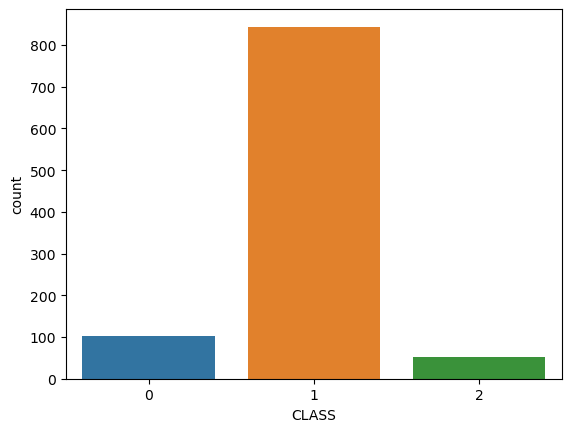

In [95]:
sns.countplot(x='CLASS',data=diabetes_data)

In [96]:
diabetes_data.columns

Index(['No_Pation', 'Gender', 'AGE', 'Urea', 'Creatinine_ratio', 'HbA1c',
       'Cholesterol', 'Triglycerides', 'HDL_Cholesterol',
       'Low_density_lipoprotein', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

Let's visualize how Cholesterol impacts Low density lipoprotein 

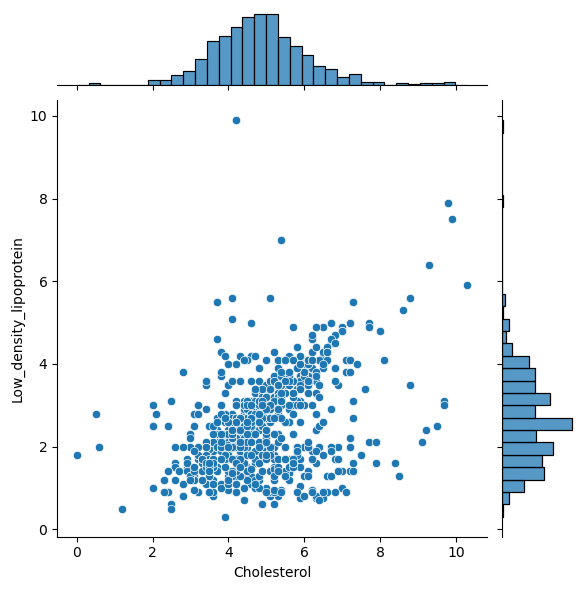

In [97]:
sns.jointplot(data = diabetes_data, x=diabetes_data['Cholesterol'],y=diabetes_data['Low_density_lipoprotein'])

Clearly, as low density lipoprotein increases with cholesterol

The gender column is dropped since we only need numerical values for machine learning

In [98]:
diabetes_data.drop("Gender",axis=1,inplace=True)

In [99]:
diabetes_data.head()

,No_Pation,AGE,Urea,Creatinine_ratio,HbA1c,Cholesterol,Triglycerides,HDL_Cholesterol,Low_density_lipoprotein,VLDL,BMI,CLASS
0,17975,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,34221,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,47975,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,87656,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,34223,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


In [100]:
X = diabetes_data.iloc[:,0:-1]
y = diabetes_data.iloc[:,-1]

In [101]:
print(X)

     No_Pation  AGE  Urea  Creatinine_ratio  HbA1c  Cholesterol  \
0        17975   50   4.7                46    4.9          4.2   
1        34221   26   4.5                62    4.9          3.7   
2        47975   50   4.7                46    4.9          4.2   
3        87656   50   4.7                46    4.9          4.2   
4        34223   33   7.1                46    4.9          4.9   
..         ...  ...   ...               ...    ...          ...   
995     454317   71  11.0                97    7.0          7.5   
996     876534   31   3.0                60   12.3          4.1   
997      87654   30   7.1                81    6.7          4.1   
998      24004   38   5.8                59    6.7          5.3   
999      24054   54   5.0                67    6.9          3.8   

     Triglycerides  HDL_Cholesterol  Low_density_lipoprotein  VLDL   BMI  
0              0.9              2.4                      1.4   0.5  24.0  
1              1.4              1.1          

In [102]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: CLASS, Length: 1000, dtype: int64


In [103]:
print(X)

     No_Pation  AGE  Urea  Creatinine_ratio  HbA1c  Cholesterol  \
0        17975   50   4.7                46    4.9          4.2   
1        34221   26   4.5                62    4.9          3.7   
2        47975   50   4.7                46    4.9          4.2   
3        87656   50   4.7                46    4.9          4.2   
4        34223   33   7.1                46    4.9          4.9   
..         ...  ...   ...               ...    ...          ...   
995     454317   71  11.0                97    7.0          7.5   
996     876534   31   3.0                60   12.3          4.1   
997      87654   30   7.1                81    6.7          4.1   
998      24004   38   5.8                59    6.7          5.3   
999      24054   54   5.0                67    6.9          3.8   

     Triglycerides  HDL_Cholesterol  Low_density_lipoprotein  VLDL   BMI  
0              0.9              2.4                      1.4   0.5  24.0  
1              1.4              1.1          

Now, we split the dataset into training and test data

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Install the imblearn dependency to help strike some balance on the data set using => pip install imblearn

In [105]:
from imblearn.over_sampling import SMOTE

In [106]:
sm = SMOTE()

In [107]:
X_train,y_train = sm.fit_resample(X_train,y_train)

In [108]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2], dtype=int64), array([563, 563, 563], dtype=int64))

Observe the balance established above

Train the model - first, using the DecisionTreeClassifier algorithm:

In [109]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
dtree_model = DecisionTreeClassifier()

Train the dataset

In [111]:
dtree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [112]:
dtree_model.score(X_test,y_test)

0.990909090909091

Evaluate model on the training and test dataset

In [113]:
dtree_pred = dtree_model.predict(X_train)
f1_score(y_train,dtree_pred,average='micro')

1.0

In [114]:
f1_score(y_test,dtree_model.predict(X_test),average='micro')

0.990909090909091

In [115]:
dtree_model_2 = DecisionTreeClassifier(max_depth=3)
dtree_model_2.fit(X_train,y_train)
dtree_model_2.score(X_test,y_test)

0.9666666666666667

In [116]:
f1_score(y_train,dtree_model_2.predict(X_train),average='micro')

0.9881586737714624

In [117]:
f1_score(y_test,dtree_model_2.predict(X_test),average='micro')

0.9666666666666667

In [118]:
from sklearn.model_selection import cross_val_score

In [119]:
cv_score = cross_val_score(dtree_model_2,X_train,y_train,cv=10)

In [120]:
cv_score

array([0.92899408, 0.98224852, 0.98224852, 0.98816568, 1.        ,
       0.98816568, 0.98816568, 0.99408284, 0.98224852, 1.        ])

In [121]:
print("Average training score is: ",cv_score.mean())

Average training score is:  0.9834319526627219


In [122]:
print("Standard deviation from training score is: ",cv_score.std())

Standard deviation from training score is:  0.019228493265410568


Engage cross validation to train and test the model on varying iterations on different portions of the dataset

In [123]:
for depth in range(2,20):
    print("With depth of: ",depth)
    cv_score = cross_val_score(DecisionTreeClassifier(max_depth=depth,max_features=None),X_train,y_train,cv=10)
    print(' Average training score: ',cv_score.mean())
    print(' Standard deviation training score: ',cv_score.std())

With depth of:  2
 Average training score:  0.9715905888982814
 Standard deviation training score:  0.01958333713094505
With depth of:  3
 Average training score:  0.9834319526627219
 Standard deviation training score:  0.019228493265410568
With depth of:  4
 Average training score:  0.9893455903071287
 Standard deviation training score:  0.010178634188858603
With depth of:  5
 Average training score:  0.9863905325443787
 Standard deviation training score:  0.01632321209956653
With depth of:  6
 Average training score:  0.9875704423781346
 Standard deviation training score:  0.016407392760578603
With depth of:  7
 Average training score:  0.9881656804733728
 Standard deviation training score:  0.014969361704939085
With depth of:  8
 Average training score:  0.9887538743307973
 Standard deviation training score:  0.014601041952979735
With depth of:  9
 Average training score:  0.9875704423781346
 Standard deviation training score:  0.01619259031986457
With depth of:  10
 Average trainin

Observe performance at dapth of 16 as provided from the above cross validation

In [124]:
improved_model = DecisionTreeClassifier(max_depth=16)
improved_model.fit(X_train,y_train)
f1_score(y_train,improved_model.predict(X_train),average='micro')

1.0

In [125]:
f1_score(y_test,improved_model.predict(X_test),average='micro')

0.9878787878787879

BELOW IS A FUNCTION WHICH MAKES UP THE PREDITIVE SYSTEM

In [126]:
def model_prediction(input_data):
    
    # change the input data into a numpy array
    input_data_as_numpy_array = np.asarray(input_data).astype(np.float32)
    
    # we reshape the array since we are redicting for one instance
    reshaped_input_data =  input_data_as_numpy_array.reshape(1,-1)
    
    # make predictions
    prediction = improved_model.predict(reshaped_input_data)
    if (prediction[0] == 0):
        return "This patient is not diabetic"
    elif (prediction[0] == 2):
        return "This patient is predicted diabetic"
    else:
        return "This patient is diabetic"

TEST THE MODEL

In [127]:
input_data = (23979,45,4.1,63,10.2,4.8,1.3,0.9,3.3,9.5,34.3)

In [128]:
predictions = model_prediction(input_data)
predictions

'This patient is diabetic'

SAVE MODEL IN PICKLE FILE FORMAT

In [129]:
import pickle
pickle_file = open("diabetes_prediction.pkl","wb")
pickle.dump(improved_model, pickle_file)
pickle_file.close()

YAYY!! IT NICELY WORKS !